In [165]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [166]:
# Importing Dataset

df=pd.read_csv(r'C:\Users\atyag\Downloads\Churn Model (Tree)\telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [167]:
df.shape

(99999, 226)

## Data Cleaning

In [168]:
#Checking Null Values in Dataframe and creting seperate dataframe for null value column percentage

df_null=pd.DataFrame(round(df.isnull().sum(axis=0)/len(df.index)*100,2))
df_null['Id']=list(range(0,226))

df_null['1']=df_null.index

df_null.set_index('Id',inplace=True)
df_null

,0,1
Id,,
0,0.00,mobile_number
1,0.00,circle_id
2,1.02,loc_og_t2o_mou
3,1.02,std_og_t2o_mou
4,1.02,loc_ic_t2o_mou
5,0.00,last_date_of_month_6
6,0.60,last_date_of_month_7
7,1.10,last_date_of_month_8
8,1.66,last_date_of_month_9


In [169]:
df_null['0']=df_null[0]

In [170]:
x=[]
for i in list(range(0,226)):
    if df_null['0'][i]>15:
        x.append(df_null['1'][i])

In [171]:
x

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [172]:
#Columns that has high percentage of null values

x=['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [173]:
# Dropping high null values columns

df=df.drop(columns=x,axis=0)
#df.shape

In [174]:
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
loc_og_t2m

In [175]:
#Describe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.

In [176]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.

In [177]:
# Fill '0' in place of NA's in few columns

df['total_rech_data_6'].fillna(0.0, inplace = True) 
df['total_rech_data_7'].fillna(0.0, inplace = True) 
df['total_rech_data_8'].fillna(0.0, inplace = True) 
df['av_rech_amt_data_6'].fillna(0.0, inplace = True) 
df['av_rech_amt_data_7'].fillna(0.0, inplace = True) 
df['av_rech_amt_data_8'].fillna(0.0, inplace = True) 

In [178]:
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

### New Feature Creation 

In [179]:
df['Total_data_rech_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['Total_data_rech_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']
df['Total_data_rech_8']=df['total_rech_data_8']*df['av_rech_amt_data_8']

In [180]:
df['Total_rech_combind_6']=df['Total_data_rech_6']+df['total_rech_amt_6']
df['Total_rech_combind_7']=df['Total_data_rech_7']+df['total_rech_amt_7']
df['Total_rech_combind_8']=df['Total_data_rech_8']+df['total_rech_amt_8']


In [181]:
df['avg_total_rech_2_mnth']=(df['Total_rech_combind_6']+df['Total_rech_combind_7'])/2


### Top 70 percentile value

In [182]:
np.percentile(df['avg_total_rech_2_mnth'],70)

478.0

In [183]:
#Deleting rows that has 'avg_total_rech_2_mnth' less than 478
df=df.loc[df['avg_total_rech_2_mnth']>=478]

In [184]:
df.shape

(30001, 199)

In [185]:
# Dropping few more columns
df=df.drop(columns=['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8'],axis=0)

In [186]:
df.shape

(30001, 193)

In [187]:
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           0.75
std_og_t2o_mou           0.75
loc_ic_t2o_mou           0.75
last_date_of_month_6     0.00
last_date_of_month_7     0.09
last_date_of_month_8     0.55
last_date_of_month_9     1.22
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              1.82
onnet_mou_7              1.79
onnet_mou_8              3.91
onnet_mou_9              6.34
offnet_mou_6             1.82
offnet_mou_7             1.79
offnet_mou_8             3.91
offnet_mou_9             6.34
roam_ic_mou_6            1.82
roam_ic_mou_7            1.79
roam_ic_mou_8            3.91
roam_ic_mou_9            6.34
roam_og_mou_6            1.82
roam_og_mou_7            1.79
roam_og_mou_8            3.91
roam_og_mou_9            6.34
loc_og_t2t_mou_6         1.82
loc_og_t2t_mou_7         1.79
loc_og_t2t_mou_8         3.91
loc_og_t2t_mou_9         6.34
loc_og_t2m

In [188]:
#Removing rows that has any null value left
df=df.loc[df.isnull().sum(axis=1)==0]

In [189]:
df.shape

(27121, 193)

In [190]:
round(df.isnull().sum(axis=0)/len(df.index)*100,2)

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
last_date_of_month_6     0.0
last_date_of_month_7     0.0
last_date_of_month_8     0.0
last_date_of_month_9     0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou

In [191]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rech_6,Total_data_rech_7,Total_data_rech_8,Total_rech_combind_6,Total_rech_combind_7,Total_rech_combind_8,avg_total_rech_2_mnth
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.0,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.0,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,437.0,955.0,327.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63

### Creating 'Churn' Column

In [194]:
#Creating condition for creation new 'Churn' columns
conditions = [
    (df['total_ic_mou_9'] == 0) | (df['total_og_mou_9'] == 0) & (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0)]
choices = [1]

df['Churn'] = np.select(conditions, choices, default=0)

In [195]:
#Churn Value Counts
df['Churn'].value_counts()

0    25940
1     1181
Name: Churn, dtype: int64

In [196]:
df.shape

(27121, 194)

In [197]:
#Columns starting with '_9' these are need to be deleted
col_9=[col for col in df if col.endswith('_9')]
col_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [198]:
df_9=df[col_9]
df_9.shape

(27121, 44)

In [199]:
#Dropping columns starting with'_9'
df=df.drop(columns=col_9,axis=0)

In [200]:
df.shape

(27121, 150)

In [201]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rech_6,Total_data_rech_7,Total_data_rech_8,Total_rech_combind_6,Total_rech_combind_7,Total_rech_combind_8,avg_total_rech_2_mnth,Churn
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,6/30/2014,7/31/2014,8/31/2014,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.0,0.00,0.0,0.0,17.71,131.91,133.68,

In [202]:
#Checking Value counts
print(df['last_date_of_month_6'].value_counts())
print(df['last_date_of_month_7'].value_counts())
print(df['last_date_of_month_8'].value_counts())

6/30/2014    27121
Name: last_date_of_month_6, dtype: int64
7/31/2014    27121
Name: last_date_of_month_7, dtype: int64
8/31/2014    27121
Name: last_date_of_month_8, dtype: int64


In [203]:
# Droping more columns
df=df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=0)


In [204]:
df.shape

(27121, 147)

In [42]:
#Value Counts
print(df['loc_og_t2o_mou'].value_counts())
print(df['std_og_t2o_mou'].value_counts())
print(df['loc_ic_t2o_mou'].value_counts())

0.0    27121
Name: loc_og_t2o_mou, dtype: int64
0.0    27121
Name: std_og_t2o_mou, dtype: int64
0.0    27121
Name: loc_ic_t2o_mou, dtype: int64


In [205]:
#Droping more columns
df=df.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=0)

In [206]:
df.shape

(27121, 144)

In [207]:
col_1=df.columns

In [208]:
col_1

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'jun_vbc_3g', 'sep_vbc_3g', 'Total_data_rech_6', 'Total_data_rech_7',
       'Total_data_rech_8', 'Total_rech_combind_6', 'Total_rech_combind_7',
       'Total_rech_combind_8', 'avg_total_rech_2_mnth', 'Churn'],
      dtype='object', length=144)

In [209]:
df.shape

(27121, 144)

In [210]:
#Importing 'datetime'
from datetime import datetime,date,time

In [212]:
#Converting variable to datetime
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'])


In [213]:
type(df['date_of_last_rech_6'])

pandas.core.series.Series

In [214]:
#Slicing 'day' from column values
df['Last_date_6']=df['date_of_last_rech_6'].dt.day
#df['just_date'] = df['dates'].dt.date
df['Last_date_6'].head()

8     25
21    30
23    18
33    30
38    30
Name: Last_date_6, dtype: int64

In [215]:
df['Last_date_6']=df['Last_date_6']
df['Last_date_6'].head()

8     25
21    30
23    18
33    30
38    30
Name: Last_date_6, dtype: int64

In [216]:
#Slicing day from 'date_of_last_rech_7'
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'])
df['Last_date_7']=df['date_of_last_rech_7'].dt.day
#df['just_date'] = df['dates'].dt.date
df['Last_date_7']=df['Last_date_7']
df['Last_date_7'].head()

8     31
21    31
23     7
33    30
38    28
Name: Last_date_7, dtype: int64

In [217]:
##Slicing day from 'date_of_last_rech_8'
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'])
df['Last_date_8']=df['date_of_last_rech_8'].dt.day
#df['just_date'] = df['dates'].dt.date
df['Last_date_8']=df['Last_date_8']
df['Last_date_8'].head()

8     30
21    31
23    24
33    26
38    24
Name: Last_date_8, dtype: int64

In [220]:
#Creating new Data frame df_new
df_new=df

In [221]:
df_new.shape

(27121, 147)

In [222]:
df_new.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rech_6,Total_data_rech_7,Total_data_rech_8,Total_rech_combind_6,Total_rech_combind_7,Total_rech_combind_8,avg_total_rech_2_mnth,Churn,Last_date_6,Last_date_7,Last_date_8
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,25,31,30
21,7002124215,109,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,2014-06-30,2014-07-31,2014-08-31,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0,30,31,31
23,7000887461,109,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.0,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.0,0.0,0.0,0.0,0.0,2.36,6.35,39.61,0.0,0.01,0.0,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.8

In [223]:
#Value_counts()

print(df_new['std_og_t2c_mou_6'].value_counts())
print(df_new['std_og_t2c_mou_7'].value_counts())
print(df_new['std_og_t2c_mou_8'].value_counts())
print(df_new['std_ic_t2o_mou_6'].value_counts())
print(df_new['std_ic_t2o_mou_7'].value_counts())
print(df_new['std_ic_t2o_mou_8'].value_counts())

0.0    27121
Name: std_og_t2c_mou_6, dtype: int64
0.0    27121
Name: std_og_t2c_mou_7, dtype: int64
0.0    27121
Name: std_og_t2c_mou_8, dtype: int64
0.0    27121
Name: std_ic_t2o_mou_6, dtype: int64
0.0    27121
Name: std_ic_t2o_mou_7, dtype: int64
0.0    27121
Name: std_ic_t2o_mou_8, dtype: int64


In [224]:


df_new['circle_id'].value_counts()

109    27121
Name: circle_id, dtype: int64

In [225]:
#Droping More Columns
df_new=df_new.drop(columns=['circle_id','std_og_t2c_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=0)

In [226]:
df_new.shape

(27121, 139)

In [227]:
df_new.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rech_6,Total_data_rech_7,Total_data_rech_8,Total_rech_combind_6,Total_rech_combind_7,Total_rech_combind_8,avg_total_rech_2_mnth,Churn,Last_date_6,Last_date_7,Last_date_8
count,2.712100e+04,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.0,27121.0,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000
mean,7.001216e+09,560.468240,572.234474,537.233994,264.394721,276.575350,250.883227,378.449191,389.486945,357.566239,16.369176,12.864368,13.289952,26.808357,20.37184,20.986006,87

In [228]:
#Droping Mobile Number
x=df_new.pop('mobile_number')


In [229]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27121 entries, 8 to 99997
Columns: 138 entries, arpu_6 to Last_date_8
dtypes: float64(109), int32(1), int64(28)
memory usage: 28.7 MB


In [230]:
df_new['Last_date_6'].dtype

dtype('int64')

In [231]:
df_new.shape

(27121, 138)

### Outlier Removal

In [232]:
Q1 =df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3-Q1
print(IQR)

#df_new1 = df_new[((df_new > Q1) & (df_new < Q3)).any(axis=1)]

arpu_6                    377.867
arpu_7                    379.432
arpu_8                    415.594
onnet_mou_6               277.750
onnet_mou_7               285.810
onnet_mou_8               249.140
offnet_mou_6              412.200
offnet_mou_7              425.450
offnet_mou_8              401.130
roam_ic_mou_6               0.000
roam_ic_mou_7               0.000
roam_ic_mou_8               0.000
roam_og_mou_6               0.000
roam_og_mou_7               0.000
roam_og_mou_8               0.000
loc_og_t2t_mou_6           76.540
loc_og_t2t_mou_7           77.600
loc_og_t2t_mou_8           75.060
loc_og_t2m_mou_6          193.970
loc_og_t2m_mou_7          193.050
loc_og_t2m_mou_8          192.770
loc_og_t2f_mou_6            4.580
loc_og_t2f_mou_7            4.790
loc_og_t2f_mou_8            4.460
loc_og_t2c_mou_6            0.000
loc_og_t2c_mou_7            0.150
loc_og_t2c_mou_8            0.150
loc_og_mou_6              303.900
loc_og_mou_7              307.450
loc_og_mou_8  

In [233]:
# Deleting outlier rows from dataset
df_new = df_new[((df_new > (Q1 - 1.5 * IQR)) & df_new > (Q3 + 1.5 * IQR)).any(axis=1)]
print(IQR)

arpu_6                    377.867
arpu_7                    379.432
arpu_8                    415.594
onnet_mou_6               277.750
onnet_mou_7               285.810
onnet_mou_8               249.140
offnet_mou_6              412.200
offnet_mou_7              425.450
offnet_mou_8              401.130
roam_ic_mou_6               0.000
roam_ic_mou_7               0.000
roam_ic_mou_8               0.000
roam_og_mou_6               0.000
roam_og_mou_7               0.000
roam_og_mou_8               0.000
loc_og_t2t_mou_6           76.540
loc_og_t2t_mou_7           77.600
loc_og_t2t_mou_8           75.060
loc_og_t2m_mou_6          193.970
loc_og_t2m_mou_7          193.050
loc_og_t2m_mou_8          192.770
loc_og_t2f_mou_6            4.580
loc_og_t2f_mou_7            4.790
loc_og_t2f_mou_8            4.460
loc_og_t2c_mou_6            0.000
loc_og_t2c_mou_7            0.150
loc_og_t2c_mou_8            0.150
loc_og_mou_6              303.900
loc_og_mou_7              307.450
loc_og_mou_8  

In [234]:
df_new.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rech_6,Total_data_rech_7,Total_data_rech_8,Total_rech_combind_6,Total_rech_combind_7,Total_rech_combind_8,avg_total_rech_2_mnth,Churn,Last_date_6,Last_date_7,Last_date_8
count,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.0,26596.0,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.00000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.00000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000,26596.000000
mean,561.630922,573.525855,538.650338,261.698515,273.916161,248.245900,378.259992,389.344875,357.437359,16.692300,13.118308,13.552293,27.337549,20.773976,21.400266,87.972283,90.458181,84.414014,169.226294,

In [235]:
df_new['Churn'].value_counts()

0    25415
1     1181
Name: Churn, dtype: int64

In [238]:
#Shifting Churn column to 'y'
y=df_new.pop('Churn')

In [239]:
y.head()

8     0
23    0
33    0
38    0
41    0
Name: Churn, dtype: int32

In [240]:
df_new.shape

(26596, 137)

## PCA

In [241]:
#Import PCA
from sklearn.decomposition import PCA

In [242]:
# Creating PCA Object

pca=PCA(random_state=42)

In [243]:
#Fiting
pca.fit(df_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [244]:
# Finding Variance Ratio

pca.explained_variance_ratio_

array([4.04950912e-01, 1.25414130e-01, 1.05886617e-01, 7.27802405e-02,
       5.27955039e-02, 4.28379878e-02, 2.90421140e-02, 2.59370750e-02,
       2.46436266e-02, 1.91383263e-02, 1.39551382e-02, 9.09776998e-03,
       8.17473274e-03, 7.96658321e-03, 6.49542878e-03, 5.74254729e-03,
       5.22044899e-03, 3.98743406e-03, 3.37642958e-03, 3.10779469e-03,
       2.70768684e-03, 2.54701696e-03, 1.93890236e-03, 1.88868785e-03,
       1.81869813e-03, 1.76352365e-03, 1.65894000e-03, 1.44841569e-03,
       1.43506463e-03, 1.17962041e-03, 1.16727206e-03, 9.98939939e-04,
       9.41838234e-04, 7.11431660e-04, 6.71808993e-04, 6.15136575e-04,
       5.55096439e-04, 4.45040087e-04, 4.10797315e-04, 3.42990629e-04,
       3.35094048e-04, 3.23030344e-04, 2.95096946e-04, 2.89759547e-04,
       2.84806410e-04, 2.56031714e-04, 2.45287132e-04, 2.25141671e-04,
       2.14307618e-04, 2.00073432e-04, 1.72227629e-04, 1.69137640e-04,
       1.60442238e-04, 1.58354681e-04, 1.17647747e-04, 9.54954642e-05,
      

In [245]:
# Finding Cummlative Variance

var_cum=np.cumsum(pca.explained_variance_ratio_)

In [246]:
var_cum

array([0.40495091, 0.53036504, 0.63625166, 0.7090319 , 0.7618274 ,
       0.80466539, 0.83370751, 0.85964458, 0.88428821, 0.90342653,
       0.91738167, 0.92647944, 0.93465417, 0.94262076, 0.94911619,
       0.95485873, 0.96007918, 0.96406662, 0.96744305, 0.97055084,
       0.97325853, 0.97580554, 0.97774445, 0.97963313, 0.98145183,
       0.98321536, 0.9848743 , 0.98632271, 0.98775778, 0.9889374 ,
       0.99010467, 0.99110361, 0.99204545, 0.99275688, 0.99342869,
       0.99404382, 0.99459892, 0.99504396, 0.99545476, 0.99579775,
       0.99613284, 0.99645587, 0.99675097, 0.99704073, 0.99732554,
       0.99758157, 0.99782686, 0.998052  , 0.9982663 , 0.99846638,
       0.99863861, 0.99880774, 0.99896819, 0.99912654, 0.99924419,
       0.99933968, 0.999433  , 0.99950078, 0.99956048, 0.99961588,
       0.99966644, 0.99971109, 0.99975315, 0.99978778, 0.99981967,
       0.99984675, 0.99986869, 0.99988843, 0.99990799, 0.9999217 ,
       0.99993437, 0.99994376, 0.9999503 , 0.99995658, 0.99996

### Scree Plot

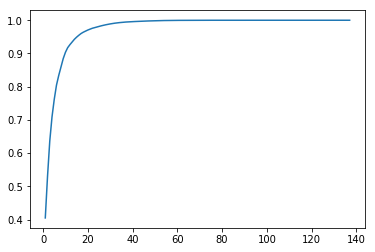

In [247]:
plt.plot(range(1,len(var_cum)+1),var_cum)

In [248]:
# from sklearn.decomposition import IncrementalPCA

from sklearn.decomposition import IncrementalPCA

In [249]:
#Creating Object
pca_final=IncrementalPCA(n_components=15)

In [250]:
# Transforming data with 15 PC's

newdata=pca_final.fit_transform(df_new)

In [251]:
newdata.shape

(26596, 15)

In [252]:
# Transposing Dataframe

pc=np.transpose(newdata)

In [253]:
pc.shape

(15, 26596)

In [254]:
# Creating DataFrame by Transposed 'pc' array

df_PCA=pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],
'PC9':pc[8],'PC10':pc[9],'PC11':pc[10],'PC12':pc[11],'PC13':pc[12],'PC14':pc[13],'PC15':pc[14]})
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1169.699264,-981.694108,-62.995606,-601.184427,-546.240477,498.660650,-264.028583,-717.533981,-171.234288,296.449822,-484.182294,191.539723,274.942020,42.278835,583.731286
1,-632.493157,-1453.432587,742.059776,-1031.442724,-161.556757,458.195470,-366.191044,-330.362233,-244.787564,-281.426896,-118.745887,39.473643,-337.482952,-619.925391,-118.989977
2,26545.873611,-3195.195921,-17827.102896,-14305.000404,1647.788767,2339.708064,676.629284,802.341370,-240.063659,518.503790,-251.436261,-106.759583,-780.485934,-2533.876329,-803.378680
3,-1696.992017,-6.374366,203.607643,-311.141108,-862.746841,316.202221,526.221594,-304.630781,628.875350,-489.099643,9.974034,137.868426,-231.525137,-3.433569,74.910040
4,-1723.746415,-922.800167,251.417330,-56.519251,255.473071,-572.375887,252.655819,313.425311,403.734042,100.621394,-136.933658,220.830958,-198.462151,-29.599272,63.598211


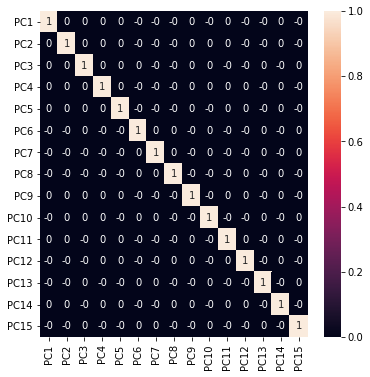

In [255]:
#Heatmap after applying PCA

plt.figure(figsize = (6,6))
sns.heatmap(round(df_PCA.corr(),2),annot = True)

## Train Test Split

In [256]:
#Importing Train_Test_split
from sklearn.model_selection import train_test_split

In [257]:
#Spliting Dataframe in Train and Test
X_train,X_test,y_train,y_test=train_test_split(df_PCA,y,train_size=.7,test_size=.3,random_state=90)

In [258]:
X_train.shape

(18617, 15)

### Data Balancing

In [259]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [260]:
X_train_res.shape

(35612, 15)

In [261]:
print(sum(y_train_res==0))
print(sum(y_train_res==1))


17806
17806


In [263]:
#Importing more Libraries for future use
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report

In [264]:

X_train_res.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1684.275546,-503.690401,3040.460537,-78.121861,879.610473,2209.137659,-283.916949,-541.196356,9.328046,-172.194090,143.188469,80.132772,163.258609,-1137.153774,352.045233
1,178.253276,-1335.363248,-810.644111,-666.664754,1032.686611,-1121.134552,1258.756308,1223.638172,361.385757,-70.102770,714.961924,17.888459,-88.628489,-81.396452,28.725135
2,-0.511705,-2004.599473,-612.381120,1287.502174,-1663.915077,-393.576477,-455.280115,-370.968772,87.241314,-275.974269,-184.765119,-93.044027,746.801851,-306.715583,-407.774394
3,1060.180863,167.291934,-789.738812,-394.965100,1456.574182,-943.910133,-317.871351,-317.564909,236.290834,242.902755,613.527888,76.098500,-130.243436,-89.288642,52.492658
4,1277.786417,3877.656526,-1658.892946,818.312096,3599.359875,-2945.877878,-562.376167,449.887335,-367.983558,1583.605412,-1084.149936,799.764698,-259.955961,206.400932,-316.165268


## Model Building

### Random Forest

In [265]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [266]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [267]:
# Making predictions
predictions = rfc.predict(X_test)

In [268]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [269]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7609
           1       0.29      0.39      0.33       370

    accuracy                           0.93      7979
   macro avg       0.63      0.67      0.65      7979
weighted avg       0.94      0.93      0.93      7979



In [270]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7252  357]
 [ 225  145]]


In [271]:
#Accuracy Score
print(accuracy_score(y_test,predictions))

0.9270585286376739


In [272]:
#AUC
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6724868843084114


Text(0.5, 0, 'False Positive Rate')

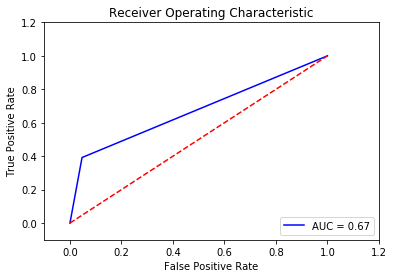

In [273]:
# AUC Curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Hyperparameter Tuning

In [118]:


# GridSearchCV to find optimal Max Depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [119]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.655275,0.141491,0.085161,0.031254,2,{'max_depth': 2},0.728906,0.730591,0.720584,0.721988,0.723673,0.725149,0.003918,4,0.733230,0.727719,0.718498,0.727554,0.731730,0.727746,0.005129
1,7.470803,0.242837,0.122554,0.023859,7,{'max_depth': 7},0.823529,0.828443,0.835159,0.830666,0.829402,0.829440,0.003745,3,0.846327,0.845554,0.842892,0.843454,0.847385,0.845122,0.001704
2,12.662352,1.969109,0.286507,0.180731,12,{'max_depth': 12},0.926997,0.921662,0.930076,0.926987,0.918562,0.924857,0.004152,2,0.957036,0.959142,0.958722,0.958477,0.957950,0.958265,0.000726
3,13.946722,1.041291,0.234615,0.070988,17,{'max_depth': 17},0.955215,0.949038,0.956332,0.953243,0.948891,0.952544,0.003086,1,0.988381,0.988522,0.987329,0.987680,0.987996,0.987982,0.000440


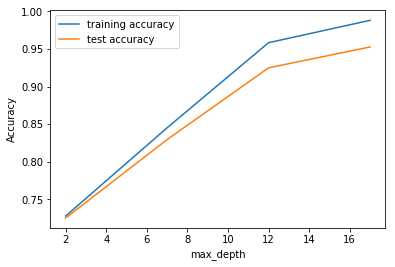

In [120]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Optimal Max_Depth:10

In [121]:


# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1,10,2)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=3)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [122]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053403,0.008873,0.002349,0.001369,1,{'n_estimators': 1},0.678506,0.699705,0.686886,0.704718,0.653468,0.684657,0.018135,5,0.694689,0.702411,0.687926,0.696244,0.663742,0.689002,0.013445
1,0.108544,0.009285,0.004579,0.002859,3,{'n_estimators': 3},0.712340,0.706444,0.737293,0.713564,0.705841,0.715096,0.011517,4,0.715610,0.712099,0.736188,0.713759,0.714286,0.718388,0.008971
2,0.165814,0.003061,0.002232,0.002221,5,{'n_estimators': 5},0.737751,0.707707,0.720584,0.734204,0.736029,0.727255,0.011507,3,0.743761,0.710801,0.718006,0.739803,0.743805,0.731235,0.014006
3,0.238383,0.008130,0.009549,0.003203,7,{'n_estimators': 7},0.731714,0.747999,0.723814,0.735187,0.727043,0.733151,0.008381,2,0.740882,0.748254,0.725097,0.744542,0.734538,0.738663,0.008155
4,0.353307,0.061513,0.013165,0.003630,9,{'n_estimators': 9},0.735364,0.746876,0.735046,0.737152,0.730974,0.737083,0.005298,1,0.741865,0.750219,0.732362,0.742401,0.736574,0.740684,0.006023


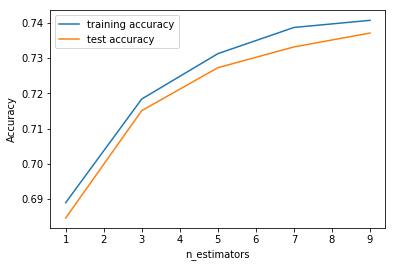

In [123]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [124]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.517394,0.395138,0.078616,0.012676,4,{'max_features': 4},0.741261,0.744069,0.738557,0.735608,0.731536,0.738206,0.004360,2,0.745902,0.744112,0.739137,0.741558,0.737452,0.741632,0.003101
1,7.743755,0.065775,0.077299,0.012504,8,{'max_features': 8},0.733820,0.740980,0.748666,0.738978,0.733642,0.739217,0.005526,1,0.742567,0.739338,0.744472,0.743278,0.744717,0.742875,0.001935
2,14.716204,2.030975,0.074049,0.005361,14,{'max_features': 14},0.728485,0.731012,0.726060,0.721848,0.726481,0.726777,0.003025,3,0.734950,0.730106,0.725588,0.726360,0.735837,0.730568,0.004235


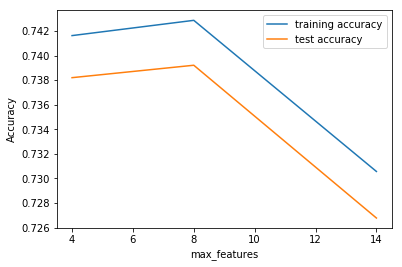

In [126]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##### Max Features:8

In [127]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(20,100,10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [128]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.236551,2.047279,0.184552,0.014788,20,{'min_samples_leaf': 20},0.902710,0.903692,0.909716,0.906487,0.895535,0.903628,0.004724,1,0.934185,0.936221,0.935205,0.934503,0.934012,0.934825,0.000808
1,10.963985,0.110389,0.178486,0.014430,30,{'min_samples_leaf': 30},0.881651,0.885020,0.892446,0.890480,0.880652,0.886050,0.004692,2,0.911615,0.911931,0.912776,0.913057,0.914040,0.912684,0.000860
2,11.635656,1.457625,0.204509,0.054427,40,{'min_samples_leaf': 40},0.867612,0.874070,0.880792,0.876439,0.864364,0.872655,0.005945,3,0.893643,0.895574,0.893963,0.897297,0.895507,0.895197,0.001311
3,11.932859,1.588379,0.166763,0.016496,50,{'min_samples_leaf': 50},0.857925,0.863681,0.867172,0.864926,0.854535,0.861648,0.004687,4,0.882165,0.884587,0.882520,0.881362,0.883573,0.882841,0.001125
4,9.898389,0.083680,0.170808,0.020422,60,{'min_samples_leaf': 60},0.846975,0.857785,0.858045,0.854535,0.848357,0.853139,0.004658,5,0.870547,0.873881,0.869954,0.869603,0.873640,0.871525,0.001852


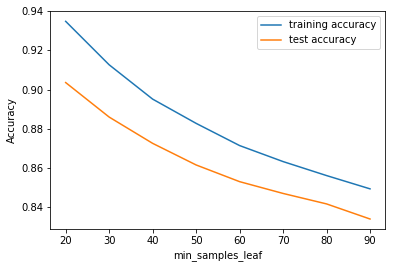

In [129]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Min. Sample leaf are less than 20

In [130]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [131]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.794568,0.530270,0.146378,0.006851,200,{'min_samples_split': 200},0.857223,0.863962,0.863100,0.867032,0.853974,0.861058,0.004758,1,0.881358,0.886412,0.880379,0.882696,0.884380,0.883045,0.002154
1,10.402814,0.520414,0.148481,0.010704,250,{'min_samples_split': 250},0.840797,0.852871,0.855378,0.854114,0.844285,0.849489,0.005833,2,0.867212,0.870160,0.869323,0.867427,0.871323,0.869089,0.001580
2,11.048253,1.084510,0.163749,0.023163,300,{'min_samples_split': 300},0.830689,0.843465,0.844707,0.845549,0.833193,0.839521,0.006274,3,0.859946,0.858682,0.857143,0.857073,0.858442,0.858257,0.001069
3,10.001686,0.137984,0.140943,0.002380,350,{'min_samples_split': 350},0.823249,0.831812,0.841337,0.837826,0.829542,0.832753,0.006340,4,0.846186,0.847555,0.847174,0.846402,0.851457,0.847755,0.001917
4,10.072009,0.239806,0.141739,0.010751,400,{'min_samples_split': 400},0.815668,0.831672,0.837405,0.831368,0.819714,0.827165,0.008131,5,0.837586,0.844256,0.844507,0.838645,0.840997,0.841198,0.002825


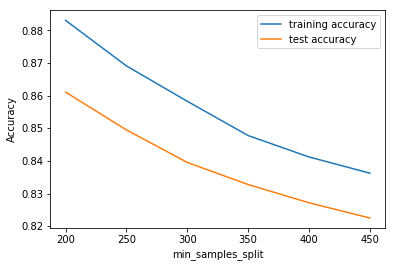

In [132]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Minimum Sample Split are less than 200

### Grid Search to Find Optimal Hyperparameters


In [364]:
# Created parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(2,20,2),
    'min_samples_split': range(10,50,10),
    'n_estimators': [10],
    'max_features': [5, 8]
}
# Created a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [170]:
# Fiting the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [171]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8856001794636345 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [279]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=2, 
                             min_samples_split=10,
                             max_features=5,
                             n_estimators=10,
                             class_weight={0:0.3, 1:0.7}
                            )

In [280]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [281]:
# predict
predictions = rfc.predict(X_test)

In [282]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [283]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      7609
           1       0.12      0.72      0.20       370

    accuracy                           0.74      7979
   macro avg       0.55      0.73      0.53      7979
weighted avg       0.94      0.74      0.82      7979



### Confusion Matrix

In [284]:
print(confusion_matrix(y_test,predictions))

[[5652 1957]
 [ 105  265]]


In [285]:
#Importing more lin=braries
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [286]:
print('Accuracy: {}'.format(metrics.accuracy_score(y_test,predictions)))
print('Recall: {}'.format(metrics.recall_score(y_test,predictions)))

Accuracy: 0.7415716255169821
Recall: 0.7162162162162162


### Logistic Regression

In [287]:
#Simple Logistic Model
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 

#classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7609
           1       0.13      0.75      0.22       370

    accuracy                           0.75      7979
   macro avg       0.55      0.75      0.53      7979
weighted avg       0.94      0.75      0.82      7979



### Logistic Regression Hypertuning & K-fold Validation

In [289]:
#K-fold Validation
params={'C':[0.0001,0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.6,1,2],'penalty':['l1','l2'],'class_weight':['balanced',{0:0.3, 1:0.7}]}
logmodel=LogisticRegression()
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator=logmodel,cv=5,param_grid=params,scoring='recall')
model.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'class_weight': ['balanced', {0: 0.3, 1: 0.7}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', 

In [324]:
#Best Score
model.best_score_

0.9402446902394633

In [290]:
#Best Parameters
model.best_params_

{'C': 0.0001, 'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l2'}

In [291]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [297]:

lr1 = LogisticRegression(penalty='l2',C=0.0001,class_weight={0: 0.3, 1: 0.7},random_state=0) 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 
  
# print classification report 
 
print('Accuracy: {}'.format(metrics.accuracy_score(y_test,predictions)))
print('Recall: {}'.format(metrics.recall_score(y_test,predictions)))


Accuracy: 0.5335255044491791
Recall: 0.8918918918918919


In [298]:
print(confusion_matrix(y_test,predictions))

[[3927 3682]
 [  40  330]]


#### I have tried to create two different models (Random Forest and Logisting Regression) for 'Churn' prediction.
#### We need better 'Recall' score so by analysing noth model i found out that Logistic Regression has better recall scaore than RF
#### So i'm choosing Logistic Regression recall as my final recall.

##### Recall: 0.89

## Finding out Important features 

In [300]:
#Using Dataset without 'PCA'
df_new.shape

(26596, 137)

In [301]:
y.head()

8     0
23    0
33    0
38    0
41    0
Name: Churn, dtype: int32

[7.69683290e-03 7.91710482e-03 1.39595273e-02 9.70999623e-03
 8.52760276e-03 8.48879148e-03 9.00141700e-03 8.45757580e-03
 9.58202214e-03 8.16562142e-03 1.29072252e-02 2.36521804e-02
 8.26153885e-03 1.71608582e-02 2.50561032e-02 7.47938790e-03
 7.06687015e-03 7.12992996e-03 8.00300328e-03 8.55527949e-03
 1.27268393e-02 5.32128493e-03 5.10567468e-03 3.71747377e-03
 6.08176602e-03 6.33677477e-03 5.49719419e-03 7.09762044e-03
 8.27029979e-03 1.16145860e-02 1.05611401e-02 8.13618465e-03
 7.97286860e-03 1.00944375e-02 8.84464173e-03 8.32941419e-03
 3.29705058e-03 2.12645196e-03 1.47193726e-03 0.00000000e+00
 0.00000000e+00 1.23021396e-02 9.35144090e-03 1.03386010e-02
 2.96025848e-03 2.37397180e-03 1.29311485e-03 7.19310277e-03
 6.81494360e-03 6.36473737e-03 5.98342744e-03 6.53129380e-04
 2.33086532e-05 9.71637740e-03 8.86287826e-03 1.53281206e-02
 7.57732529e-03 7.62388962e-03 1.19985465e-02 8.28801840e-03
 9.86912995e-03 1.68318299e-02 6.25431065e-03 6.28351224e-03
 5.66579222e-03 8.271901

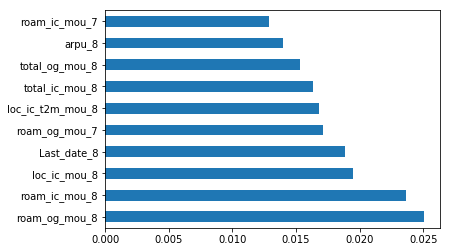

In [302]:
# Feature Graph
X = df_new.iloc[:,0:137]  #independent columns
y = y    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#Using inbuilt class feature_importances of tree based classifiers
#ploting graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Top 10 Features

In [303]:
feat_importances.nlargest(10)

roam_og_mou_8       0.025056
roam_ic_mou_8       0.023652
loc_ic_mou_8        0.019468
Last_date_8         0.018816
roam_og_mou_7       0.017161
loc_ic_t2m_mou_8    0.016832
total_ic_mou_8      0.016377
total_og_mou_8      0.015328
arpu_8              0.013960
roam_ic_mou_7       0.012907
dtype: float64

#### Top 10 Features 

roam_og_mou_8      
roam_ic_mou_8       
loc_ic_mou_8        
Last_date_8         
total_ic_mou_8     
loc_ic_t2m_mou_8    
roam_og_mou_7       
total_og_mou_8     
loc_og_t2m_mou_8    
roam_ic_mou_7       

## Visualization

In [304]:
#Columns
p=['roam_og_mou_8','roam_ic_mou_8','loc_ic_mou_8','Last_date_8','total_ic_mou_8','loc_ic_t2m_mou_8','roam_og_mou_7','total_og_mou_8','loc_og_t2m_mou_8','roam_ic_mou_7']



In [305]:
df_feat_new=df_new[p]
df_feat_new['Churn']=y

In [306]:
df_feat_new.shape

(26596, 11)

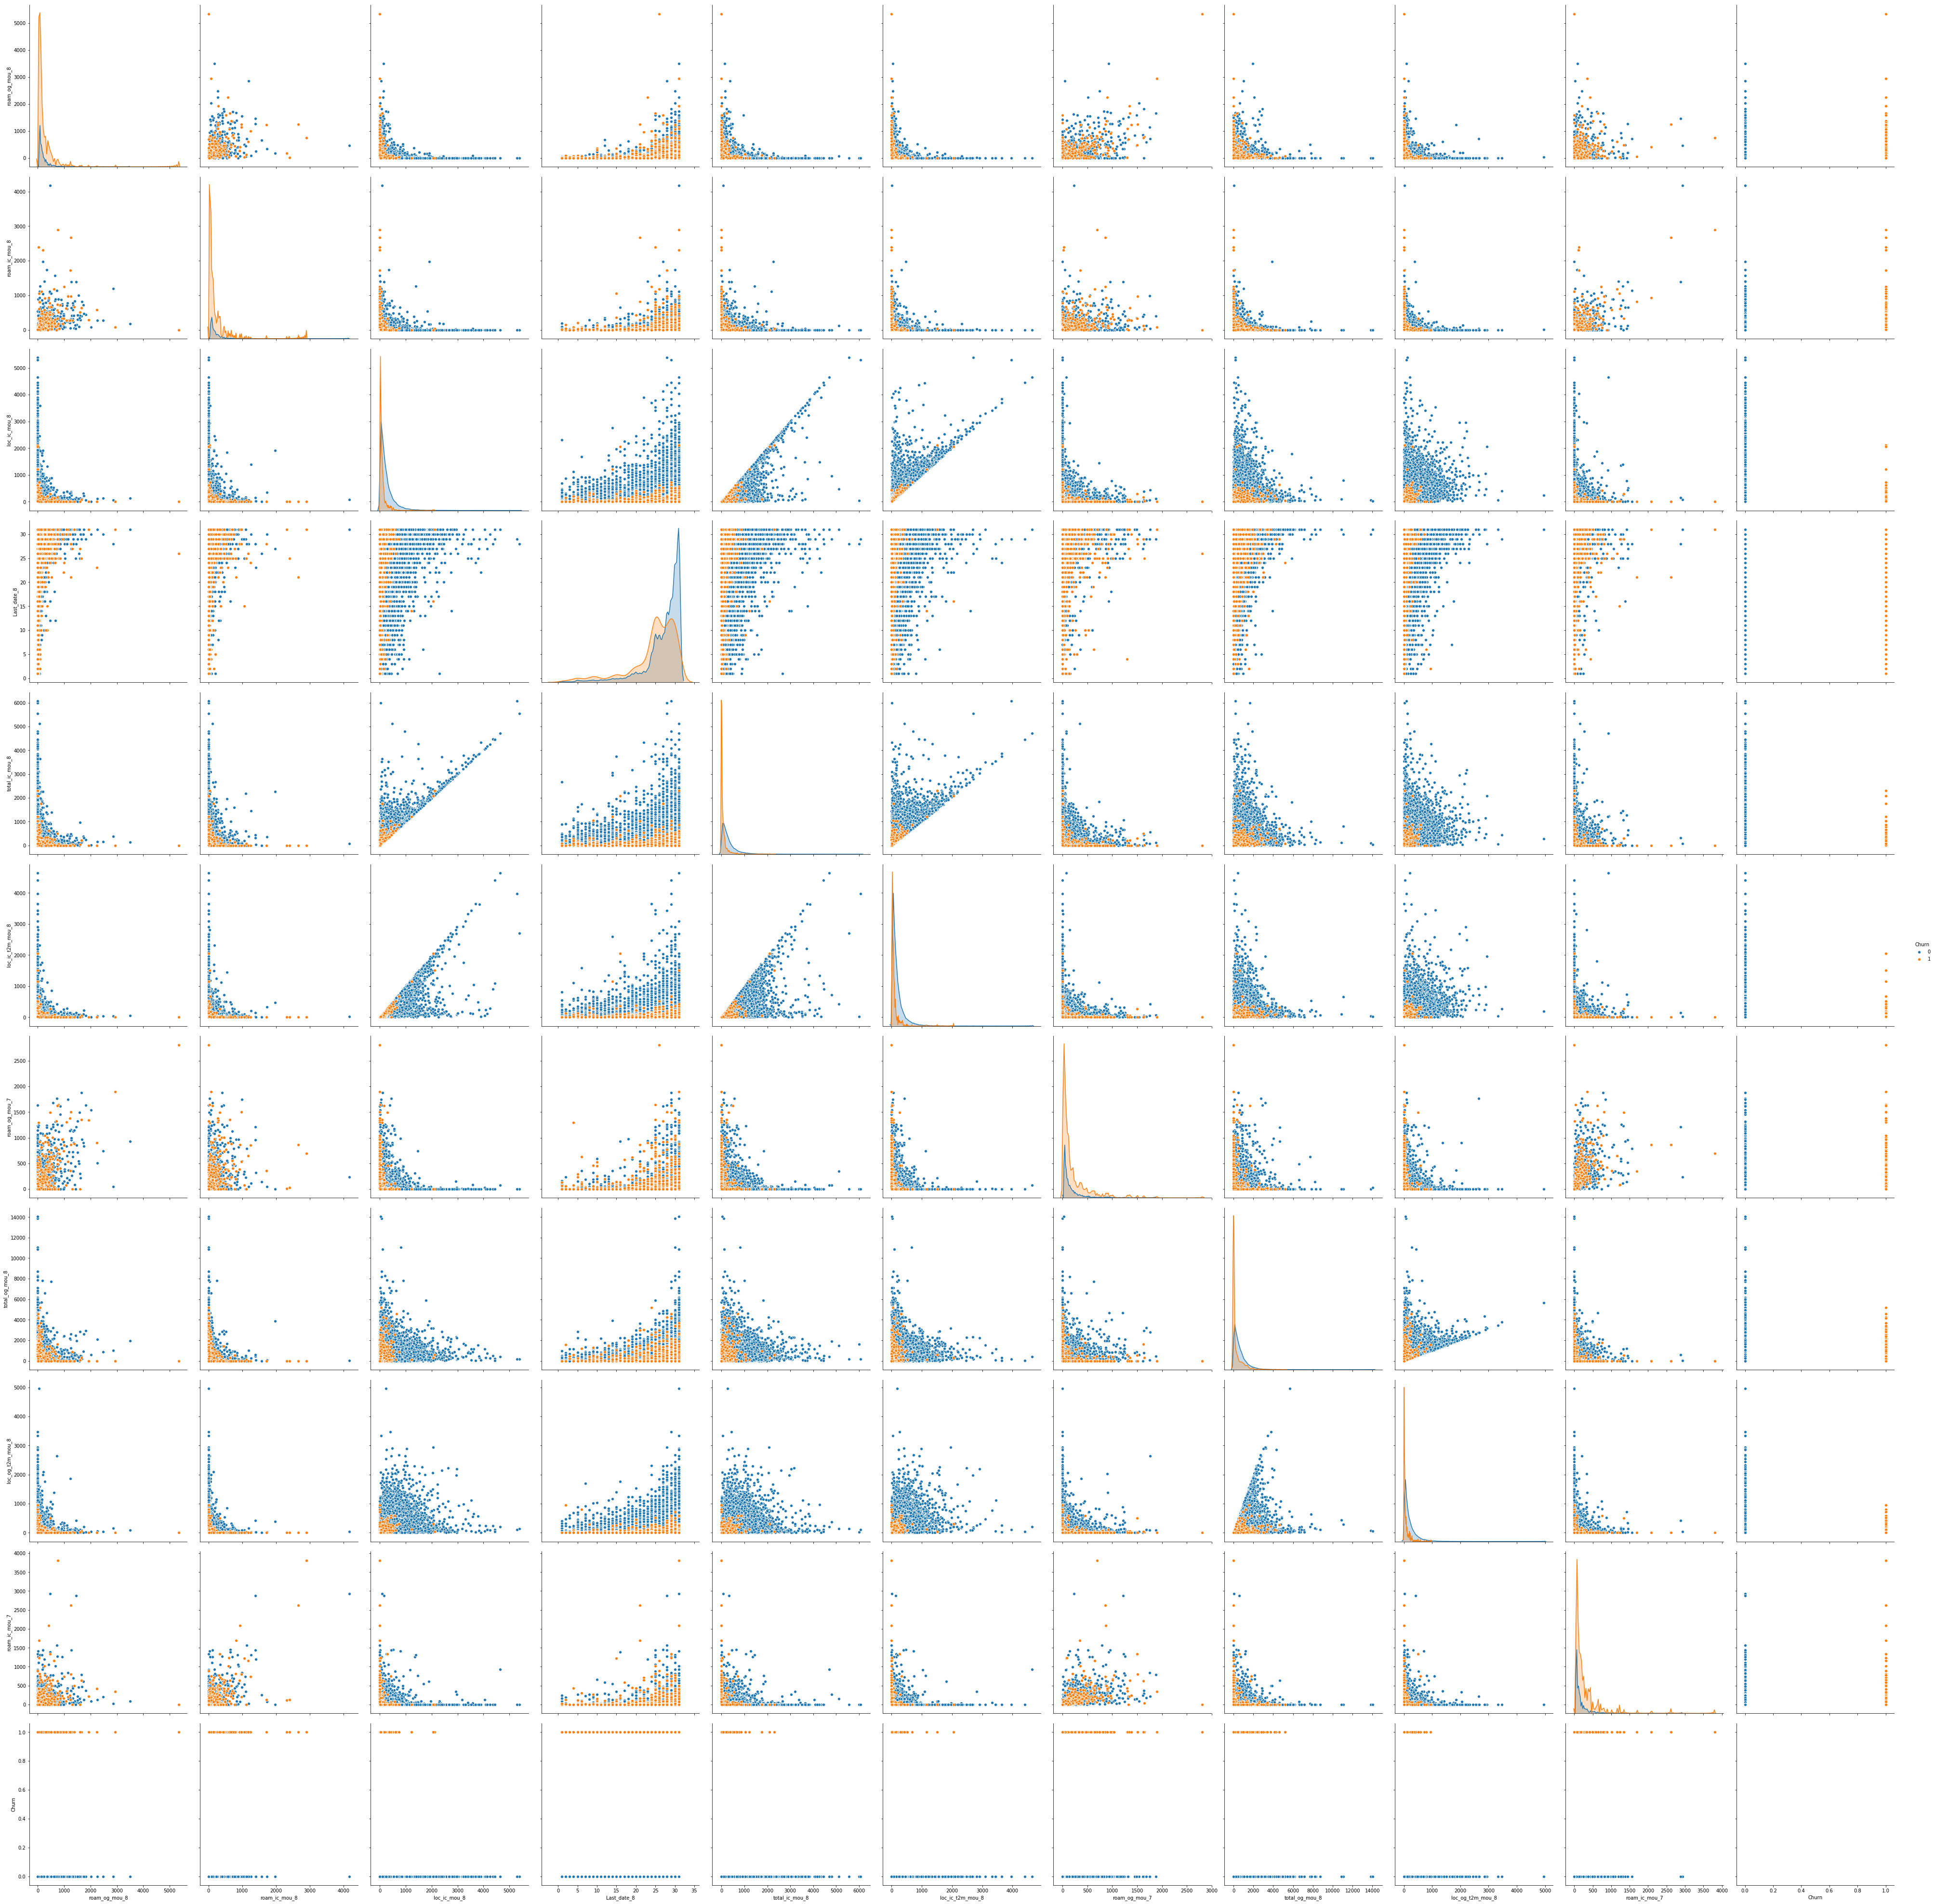

In [113]:
#Pair Plot
sns.pairplot(df_feat_new,hue='Churn',size=5)

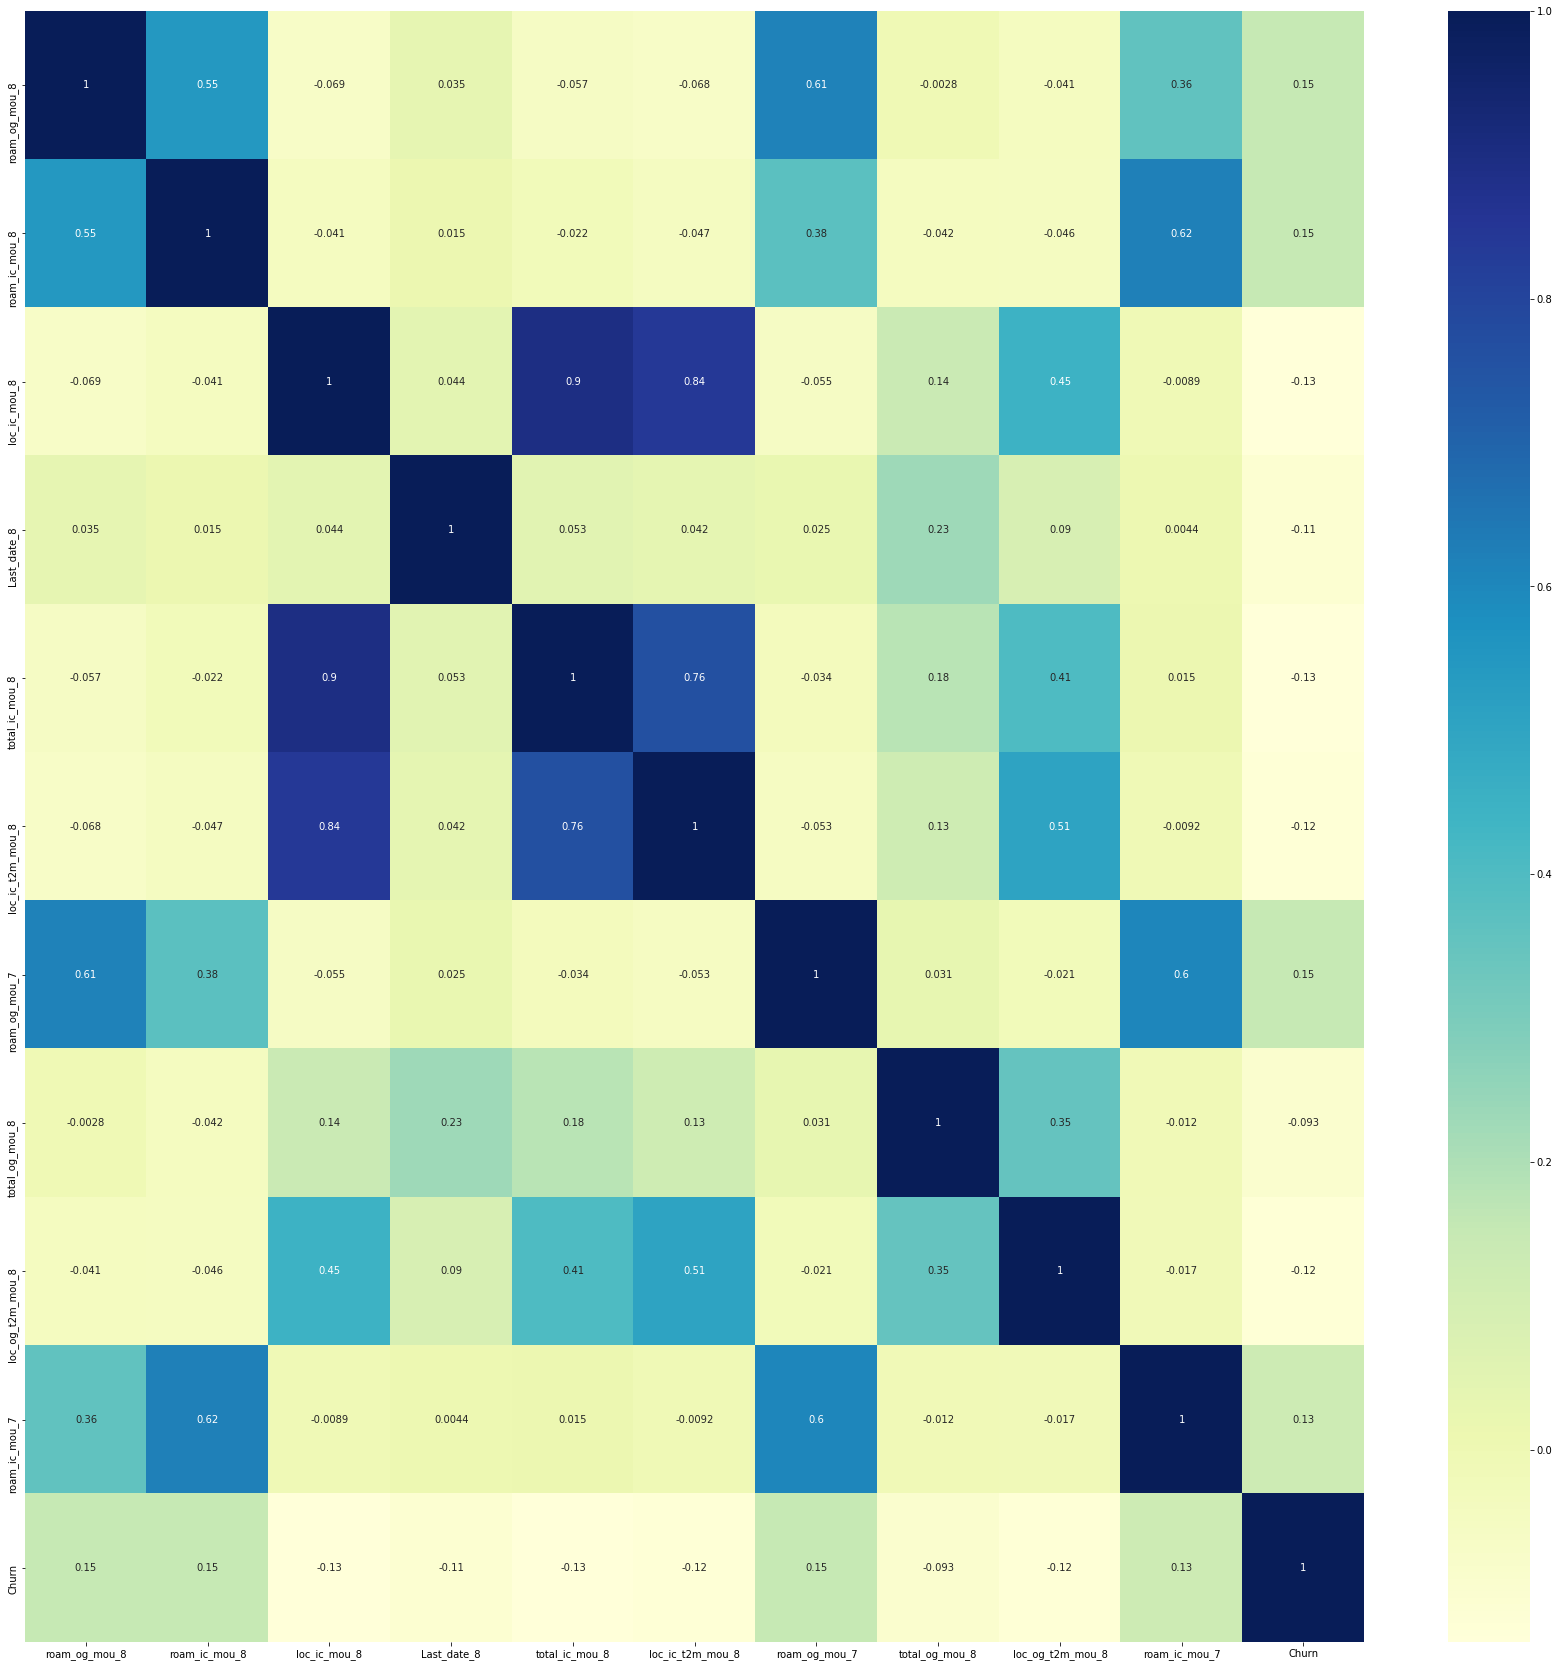

In [307]:
#Heat Map
curr_10 = df_feat_new
cor10 = curr_10.corr()
round(cor10, 3)
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor10, cmap="YlGnBu", annot=True)
plt.show()

In [308]:
df_feat=df

In [309]:
df_feat['Total_roam_og_mou']=df_feat['roam_og_mou_6']+df_feat['roam_og_mou_7']+df_feat['roam_og_mou_8']

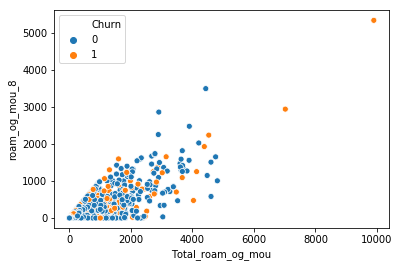

In [310]:
#Scatter Plot b/w 'Total_roam_og_mou' and 'roam_og_mou_8'
sns.scatterplot(x="Total_roam_og_mou", y="roam_og_mou_8", hue="Churn",data=df)

#### Scatter Plots b/w some highly correlated variables 

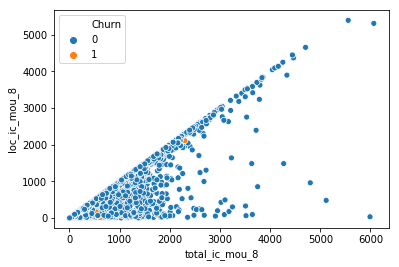

In [311]:
sns.scatterplot(x="total_ic_mou_8", y="loc_ic_mou_8", hue="Churn",data=df_feat_new)

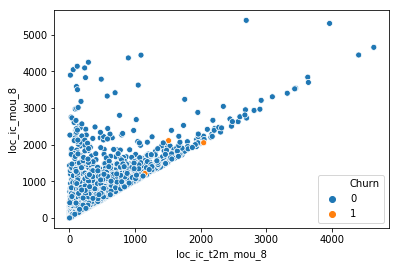

In [312]:
sns.scatterplot(x="loc_ic_t2m_mou_8", y="loc_ic_mou_8", hue="Churn",data=df_feat_new)

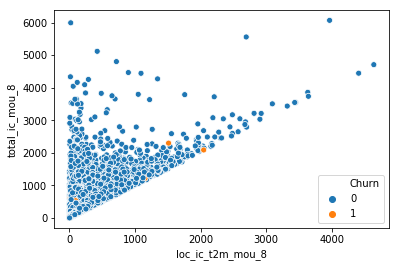

In [313]:
sns.scatterplot(x="loc_ic_t2m_mou_8", y="total_ic_mou_8", hue="Churn",data=df_feat_new)

#### Bar Plots B/w top features and 'Churn'

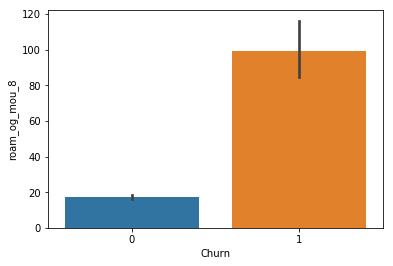

In [315]:
sns.barplot(x="Churn", y="roam_og_mou_8", data=df_feat)

#### Churned customers doing more outgoing calls in 8th month from roaming(Above Plot)

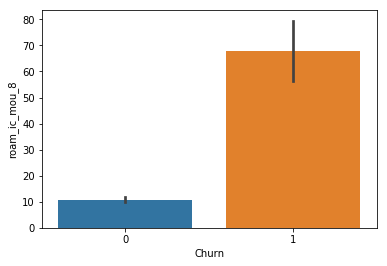

In [317]:
sns.barplot(x="Churn", y="roam_ic_mou_8", data=df_feat)

#### Churned customers doing more incoming calls in 8th month from roaming (Above plot)

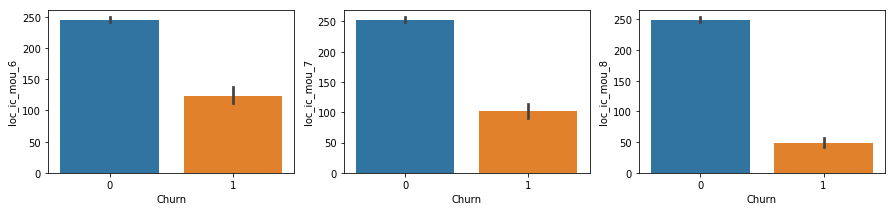

In [318]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="loc_ic_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="loc_ic_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="loc_ic_mou_8", data=df_feat)

#### Minimum Incoming usage by 'Churned' custumers is decreasing every month (Above plot)

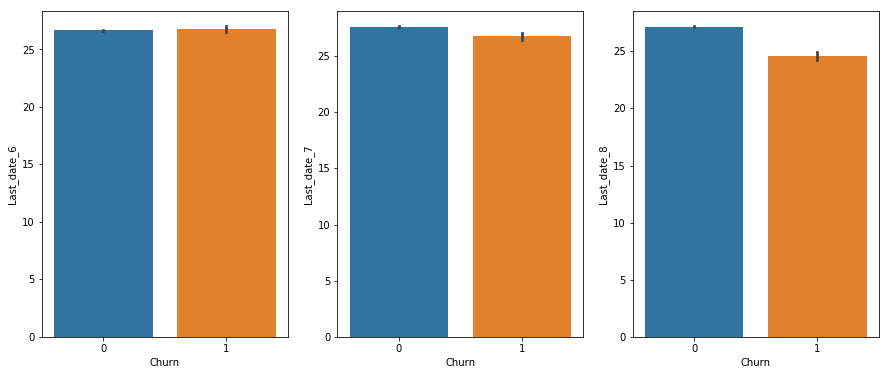

In [320]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="Last_date_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="Last_date_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="Last_date_8", data=df_feat)

#### Last Day of Recharge in 8th month is lesser than 6th and 7th month (Above plot)

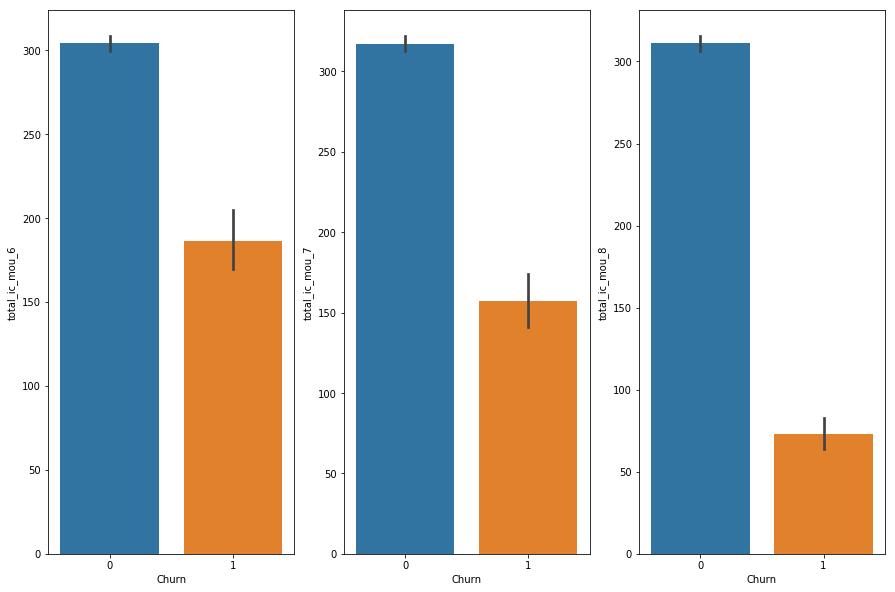

In [136]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="total_ic_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="total_ic_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="total_ic_mou_8", data=df_feat)

#### Total Incoming is lesser in 8th month as compare to 6th and 7th (Above plot)

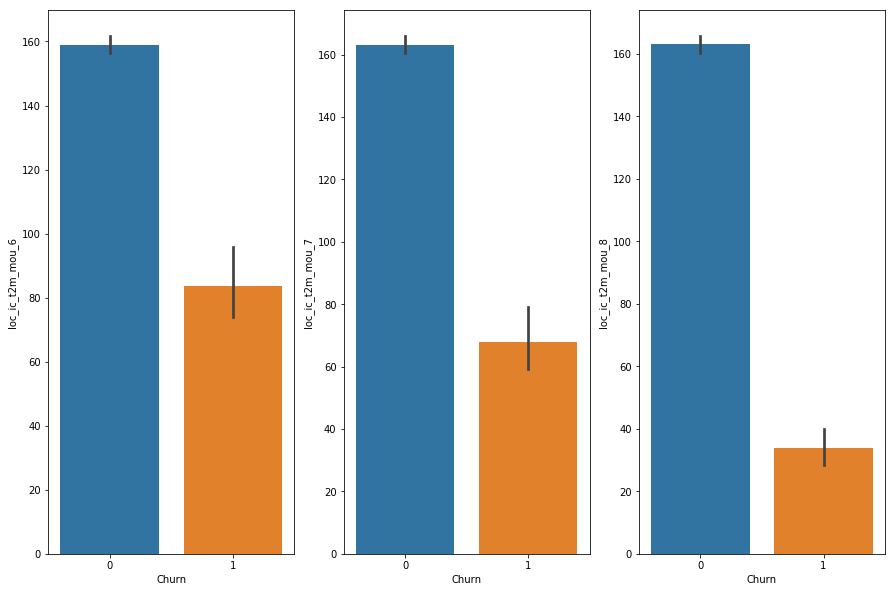

In [138]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="loc_ic_t2m_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="loc_ic_t2m_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="loc_ic_t2m_mou_8", data=df_feat)

#### Local incoming T2M is decreasing every month. Specially in 8th month (Above plot)

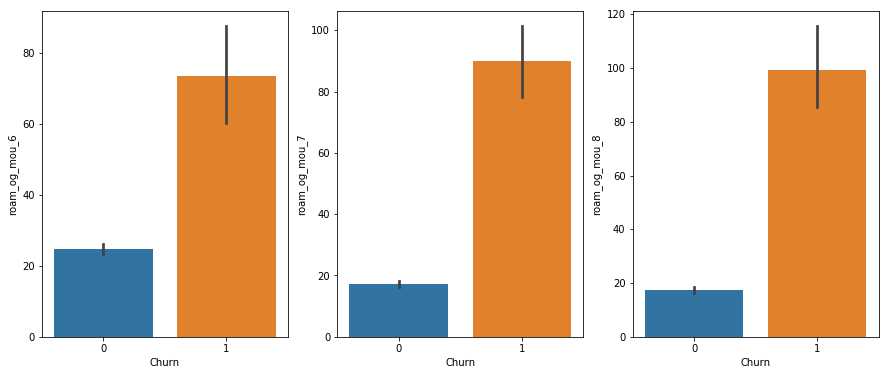

In [324]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="roam_og_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="roam_og_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="roam_og_mou_8", data=df_feat)

#### Roaming Outgoing is constant every month that's a bad sign (Above plot)

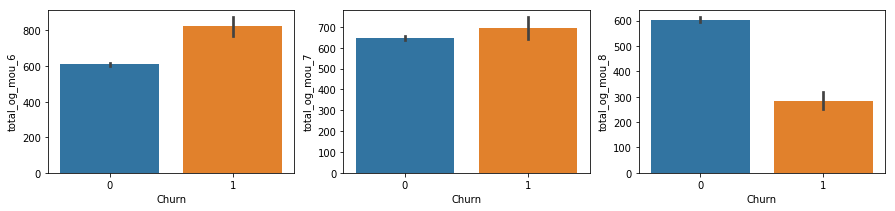

In [322]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="total_og_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="total_og_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="total_og_mou_8", data=df_feat)

#### Total outgoing call minutes has been decreased by churned customers in 8th month. (Above plot)

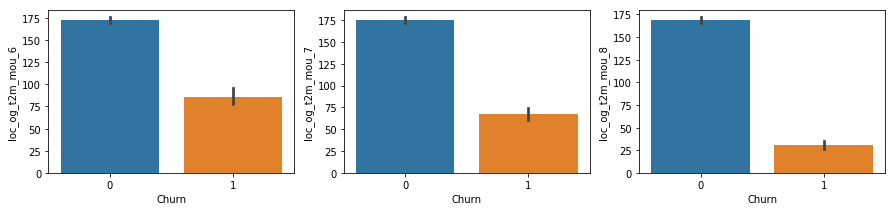

In [145]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="loc_og_t2m_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="loc_og_t2m_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="loc_og_t2m_mou_8", data=df_feat)

#### Local outgoing T2M has decreased in 8th month. (Above plot)

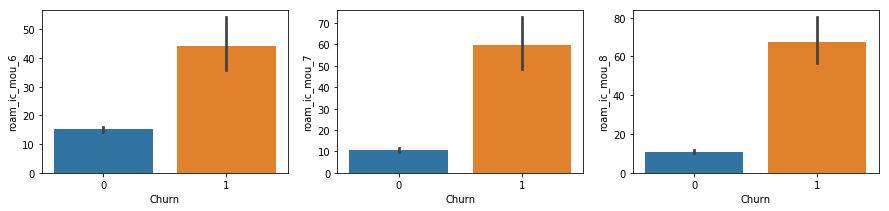

In [149]:
fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(1,3,1)
sns.barplot(x="Churn", y="roam_ic_mou_6", data=df_feat)

ax=fig.add_subplot(1,3,2)
sns.barplot(x="Churn", y="roam_ic_mou_7", data=df_feat)

ax=fig.add_subplot(1,3,3)
sns.barplot(x="Churn", y="roam_ic_mou_8", data=df_feat)

#### Roaming Incoming is constant which is not a good sign. (Above plot)

### Recommendations

#### 1. If customer (outgoing and incoming) calls usage in roaming has increased that means you need to provide him local SIM for that area. 

#### 2. Check time period of customer in roaming. If he is in roaming for long time that means he is probably shifted to that area and he is planning to change his plan. If some other company reach out to him in that phase and provide him better offer than that customer will probably get 'Churned'.

#### 3. If local incoming has decreased that means customer has been using different SIM. In some month he will shift to other SIM completely.

#### 4. Roaming outgoing is contant from longer time that means he is paying roaming charges for long time. He can shift to other operator.

#### 5. Total outgoing call usage has been decreased that means he is not satisfied with his current plan and call charges.

#### 6. Last rechage duration has increased that means customer doern't want to use your service. 